In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import json
import os
import gc
from datetime import timedelta, datetime
import pprint

from cerebralcortex.cerebralcortex import CerebralCortex
import matplotlib.pyplot as plt
import numpy as np

#from cerebralcortex.core.data_manager.raw.file_to_db import FileToDB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
def extract_matched_labels(labels: list, keywords: list)->list:
    """
    Extract sensor stream labels which contain all the keywords
    """
    results = list()
    for label in labels:
        matched = True
        for keyword in keywords:
            matched = matched and (keyword in label)
        if matched:
            results.append(label)
    return results

def time_diff(ts_list: list)->list:
    """
    Return a series of time differences between consecutive datapoints.
    Return: list[timedelta]
    """
    length = len(ts_list)
    ts_dfs = list()
    for ts1, ts0 in zip(ts_list[1:], ts_list[0:length-1]):
        ts_dfs.append(ts1-ts0)
    return ts_dfs


In [46]:
# All user IDs
USER_IDS = ['00162d05-3248-4b7d-b4f6-8593b4faaa63',
            '03996723-2411-4167-b14b-eb11dfc33124',
            '00ab666c-afb8-476e-9872-6472b4e66b68',
            '03c26210-7c9f-4bf2-b1c2-59d0bd64ffac',
            '022e4ff8-e1af-43dc-b747-862ac83518d2',
            '03ec3750-641a-4039-8b5d-74b485bde1ea',
            '02e82ef0-acb8-4366-8c83-4c3f2f69f7ea',
            '0457f007-211c-4dc3-844e-47d724fece51',
            '038aafca-cc30-47c6-9cbe-5c2cb52d8f04']

pp = pprint.PrettyPrinter(indent=2)

# Load CerebralCortex Configurations
CC = CerebralCortex("/home/mperf/sandeep/CerebralCortex-DockerCompose/cc_config_file/cc_vagrant_configuration.yml")

# Type of sensor streams

In [47]:
all_streams = list(CC.get_user_streams_metadata(USER_IDS[1]))
phone_streams = list()
motionsense_streams = list()
beacon_streams = list()

for key in all_streams:
    if'org.md2k.phonesensor--PHONE' in key:
        phone_streams.append(key)
    elif 'org.md2k.motionsense' in key:
        motionsense_streams.append(key)
    elif 'org.md2k.beacon--BEACON' in key:
        beacon_streams.append(key)
phone_streams = sorted(phone_streams)
motionsense_streams = sorted(motionsense_streams)
pp.pprint(phone_streams)
pp.pprint(motionsense_streams)
pp.pprint(beacon_streams)

[ 'ACCELEROMETER--org.md2k.phonesensor--PHONE',
  'ACTIVITY_TYPE--org.md2k.phonesensor--PHONE',
  'AMBIENT_LIGHT--org.md2k.phonesensor--PHONE',
  'AMBIENT_TEMPERATURE--org.md2k.phonesensor--PHONE',
  'AMBIENT_TEMPERATURE_SUMMARY_DAY--org.md2k.phonesensor--PHONE',
  'AMBIENT_TEMPERATURE_SUMMARY_HOUR--org.md2k.phonesensor--PHONE',
  'AMBIENT_TEMPERATURE_SUMMARY_MINUTE--org.md2k.phonesensor--PHONE',
  'AMBIENT_TEMPERATURE_SUMMARY_TOTAL--org.md2k.phonesensor--PHONE',
  'BATTERY--org.md2k.phonesensor--PHONE',
  'GEOFENCE--LIST--org.md2k.phonesensor--PHONE',
  'GYROSCOPE--org.md2k.phonesensor--PHONE',
  'PRESSURE--org.md2k.phonesensor--PHONE',
  'PROXIMITY--org.md2k.phonesensor--PHONE',
  'PROXIMITY_SUMMARY_DAY--org.md2k.phonesensor--PHONE',
  'PROXIMITY_SUMMARY_HOUR--org.md2k.phonesensor--PHONE',
  'PROXIMITY_SUMMARY_MINUTE--org.md2k.phonesensor--PHONE',
  'PROXIMITY_SUMMARY_TOTAL--org.md2k.phonesensor--PHONE',
  'STEP_COUNT--org.md2k.phonesensor--PHONE',
  'STEP_COUNT_SUMMARY_DAY--org.md2k

/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:180: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)


# Formulate hypothesis

## Visualize BLE Beacon Data Streams

/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)
/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:85: PendingDeprecationWarning: user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.
  warnings.warn("user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.", PendingDeprecationWarning)


[1.547e+03 4.730e+02 3.790e+02 7.843e+03 8.532e+03 1.480e+02 9.200e+01
 1.107e+03 1.171e+03 4.400e+01 4.000e+01 4.360e+02 4.820e+02 2.700e+01
 1.100e+01 2.000e+02 2.180e+02 1.200e+01 1.300e+01 9.900e+01 1.190e+02
 3.000e+00 7.000e+00 6.000e+01 6.000e+01 6.000e+00 3.000e+00 2.600e+01
 3.900e+01 9.000e+00 4.000e+00 1.700e+01 2.300e+01 2.000e+00 3.000e+00
 1.600e+01 1.500e+01 5.000e+00 3.000e+00]


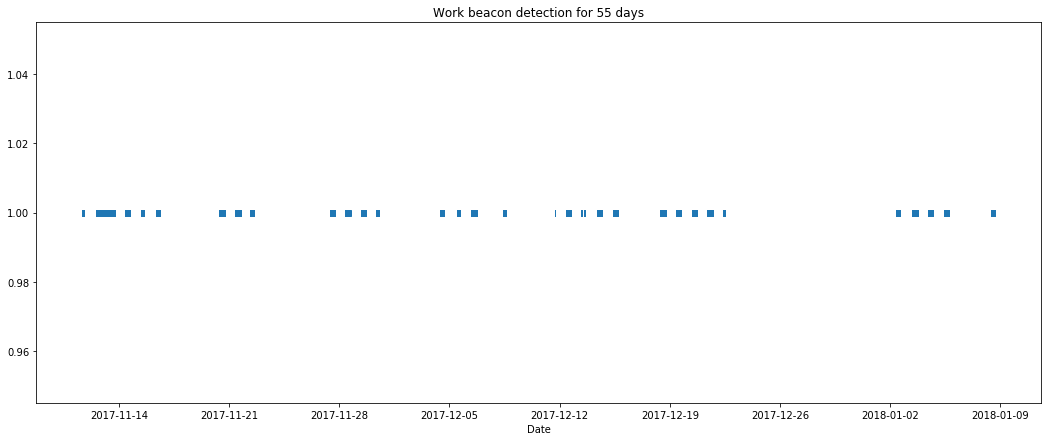

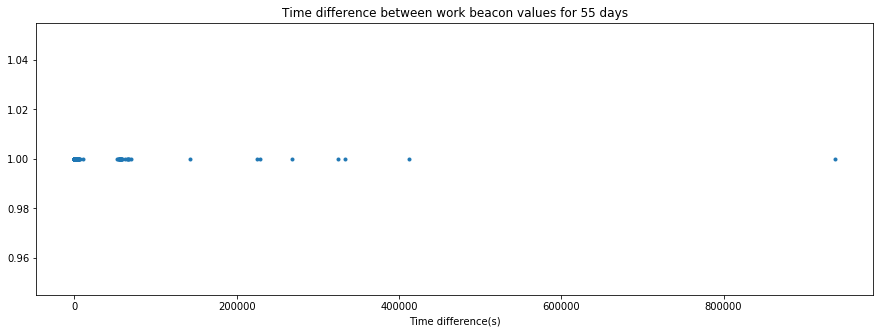

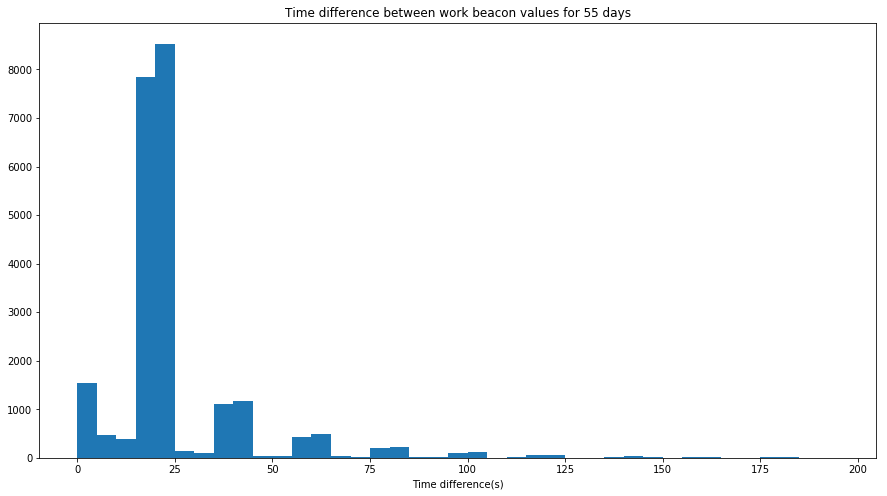

In [48]:
user_id = USER_IDS[1]
user_streams = CC.get_user_streams(user_id)
stream_labels = list(user_streams.keys())

# Get beacon stream at work place
work_bcn_stream_labels = extract_matched_labels(stream_labels, ['BEACON', 'WORK'])
if work_bcn_stream_labels:
    work_bcn_stream = user_streams[work_bcn_stream_labels[0]]
    # List for all timestamps
    ts_list = list()

    # List for all time difference in seconds
    tdf_sec = list()

    # Number of days
    stream_day_cnt = 0

    # Get all timestamps (Datetime obj) in a list
    for stream_id in work_bcn_stream['stream_ids']:
        stream_days = CC.get_stream_days(stream_id)
        stream_day_cnt += len(stream_days)
        for i, stream_day in enumerate(stream_days):
            ds = CC.get_stream(stream_id, user_id, stream_day)
            ts_list += [dp.start_time + timedelta(milliseconds=dp.offset) for dp in ds.data]

    tdf_sec = [tdf.total_seconds() for tdf in time_diff(ts_list)]


    plt.figure(figsize=(18,7))
    plt.plot(ts_list, np.ones(len(ts_list)), '|')
    plt.title('Work beacon detection for %d days'%stream_day_cnt)
    plt.xlabel('Date')

    plt.figure(figsize=(15,5))
    plt.plot(tdf_sec, np.ones(len(tdf_sec)), '.')
    plt.title('Time difference between work beacon values for %d days'%stream_day_cnt)
    plt.xlabel('Time difference(s)')

    plt.figure(figsize=(15,8))
    hist_results = plt.hist(tdf_sec, bins=np.arange(0,40)*5)
    plt.title('Time difference between work beacon values for %d days'%stream_day_cnt)
    plt.xlabel('Time difference(s)')
    
    print(hist_results[0])

## Visualize beacon distance

/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)
/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:85: PendingDeprecationWarning: user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.
  warnings.warn("user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.", PendingDeprecationWarning)


1.347599314849728
0.7120772412581653


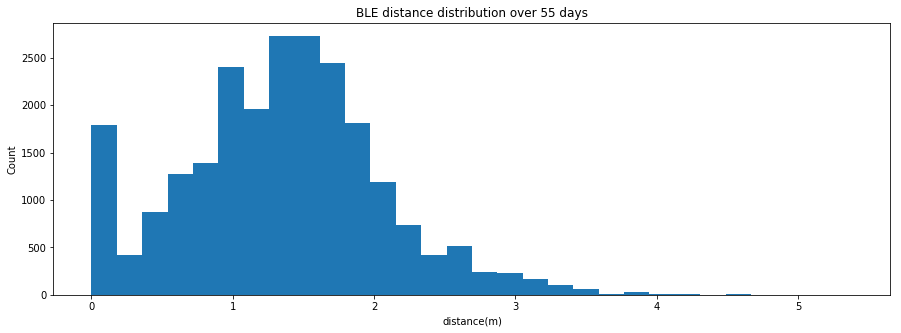

In [27]:
user_id = USER_IDS[1]
user_streams = CC.get_user_streams(user_id)
stream_labels = list(user_streams.keys())

# Get beacon stream at work place
work_bcn_stream_labels = extract_matched_labels(stream_labels, ['BEACON', 'WORK'])
if work_bcn_stream_labels:
    work_bcn_stream = user_streams[work_bcn_stream_labels[0]]
    # Get all distance values in a list
    dist_list = list()
    for stream_id in work_bcn_stream['stream_ids']:
        stream_days = CC.get_stream_days(stream_id)
        for i, stream_day in enumerate(stream_days):
            ds = CC.get_stream(stream_id, user_id, stream_day)
            dist_list += [dp.sample[0] for dp in ds.data]
            ts_list = [dp.start_time + timedelta(milliseconds=dp.offset) for dp in ds.data]

plt.figure(figsize=(15,5))
plt.hist(dist_list, bins=30)
plt.xlabel('distance(m)')
plt.ylabel('Count')
plt.title('BLE distance distribution over 55 days')
print(np.mean(dist_list))
print(np.std(dist_list))

## Correlation between user activity type and work BLE beacons

/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)
/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:85: PendingDeprecationWarning: user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.
  warnings.warn("user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.", PendingDeprecationWarning)


Text(0.5,1,'Work BLE vs activity type on 2017-11-15\n')

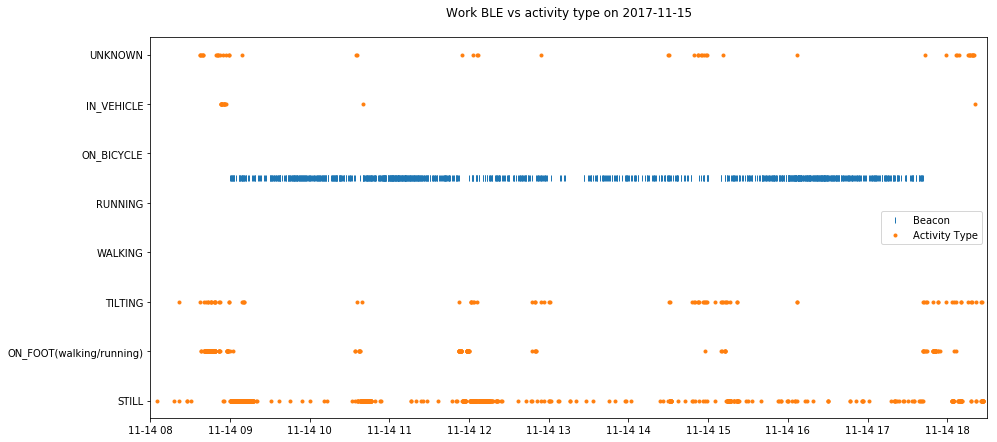

In [28]:
user_id = USER_IDS[1]
user_streams = CC.get_user_streams(user_id)
stream_labels = list(user_streams.keys())

# Get stream labels
act_type_label = 'ACTIVITY_TYPE--org.md2k.phonesensor--PHONE'
work_bcn_stream_labels = extract_matched_labels(stream_labels, ['BEACON', 'WORK'])

# Get beacon stream and activity type stream
work_bcn_stream = user_streams[work_bcn_stream_labels[0]]
act_type_stream = user_streams[act_type_label]

plt.figure(figsize=(15,7))
stream_id = work_bcn_stream['stream_ids'][0]
data = CC.get_stream(stream_id, user_id, '20171114').data + CC.get_stream(stream_id, user_id, '20171115').data
# Get all timestamps
ts_list = [dp.start_time + timedelta(milliseconds=dp.offset) for dp in data]
plt.plot(ts_list, 4.5*np.ones(len(ts_list)), '|', label='Beacon')

        
stream_id = act_type_stream['stream_ids'][0]
data = CC.get_stream(stream_id, user_id, '20171114').data + CC.get_stream(stream_id, user_id, '20171115').data
# Get all timestamps
ts_list = [dp.start_time + timedelta(milliseconds=dp.offset) for dp in data]   
act_type_list = [dp.sample[0] for dp in data]
plt.plot(ts_list, act_type_list, '.', label='Activity Type')


activity_type_yticks = ['STILL', 
                        'ON_FOOT(walking/running)', 
                        'TILTING', 
                        'WALKING', 
                        'RUNNING', 
                        'ON_BICYCLE', 
                        'IN_VEHICLE', 
                        'UNKNOWN']
plt.yticks(np.arange(0, 8), activity_type_yticks)
plt.xlim((datetime(2017,11,14,8,0),datetime(2017,11,14,18,30)))
plt.legend()
plt.title("Work BLE vs activity type on 2017-11-15\n")

## Correlation between wristband accelerometer and work BLE beacons

/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)
/home/mperf/sandeep/CerebralCortex/cerebralcortex/cerebralcortex.py:85: PendingDeprecationWarning: user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.
  warnings.warn("user_id is not a required parameter. This parameter will be removed in CerebralCortex version3.0.", PendingDeprecationWarning)


['20171211', '20171212', '20171213', '20171214', '20171215', '20171216', '20171217', '20171218', '20171219', '20171220', '20171221', '20171222', '20171223', '20171224', '20171225', '20171226', '20171227', '20171228', '20171229', '20171230', '20171231', '20180101', '20180102', '20180103', '20180104', '20180105', '20180106', '20180107', '20180108', '20180109', '20180110', '20180111', '20180112', '20180113', '20180114', '20180115', '20180116', '20180117', '20180118', '20180119', '20180120', '20180121', '20180122']


Text(0.5,1,'Left Wristband Accelerometer vs activity type on 2017-12-12\n')

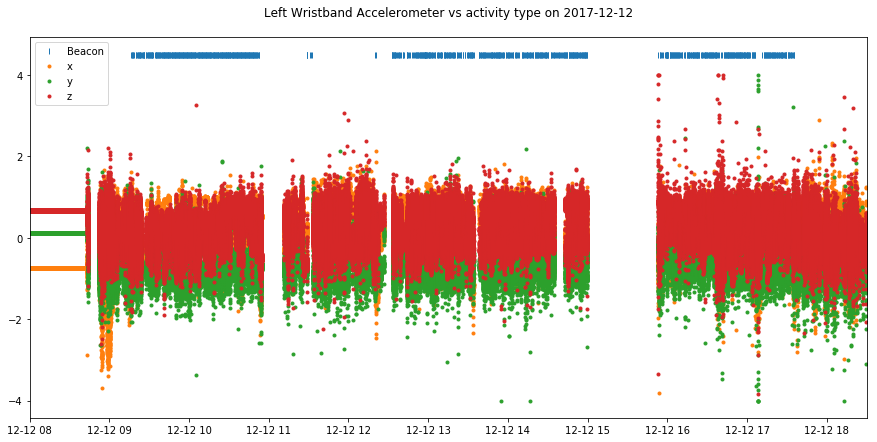

In [43]:
user_id = USER_IDS[1]
user_streams = CC.get_user_streams(user_id)
stream_labels = list(user_streams.keys())
#pp.pprint(stream_labels)

# Get stream labels
act_type_label = 'ACCELEROMETER--org.md2k.motionsense--MOTION_SENSE_HRV--LEFT_WRIST'
work_bcn_stream_labels = extract_matched_labels(stream_labels, ['BEACON', 'WORK'])

# Get beacon stream and activity type stream
work_bcn_stream = user_streams[work_bcn_stream_labels[0]]
act_type_stream = user_streams[act_type_label]

plt.figure(figsize=(15,7))
stream_id = work_bcn_stream['stream_ids'][1]

data = CC.get_stream(stream_id, user_id, '20171212').data + CC.get_stream(stream_id, user_id, '20171213').data
# Get all timestamps
ts_list = [dp.start_time + timedelta(milliseconds=dp.offset) for dp in data]
plt.plot(ts_list, 4.5*np.ones(len(ts_list)), '|', label='Beacon')

        
stream_id = act_type_stream['stream_ids'][0]
stream_days = CC.get_stream_days(stream_id)
print(stream_days)
data = CC.get_stream(stream_id, user_id, '20171212').data + CC.get_stream(stream_id, user_id, '20171213').data
# Get all timestamps
ts_list = [dp.start_time + timedelta(milliseconds=dp.offset) for dp in data]   
accel_x = [dp.sample[0] for dp in data]
accel_y = [dp.sample[1] for dp in data]
accel_z = [dp.sample[2] for dp in data]
plt.plot(ts_list, accel_x, '.', label='x')
plt.plot(ts_list, accel_y, '.', label='y')
plt.plot(ts_list, accel_z, '.', label='z')


plt.xlim((datetime(2017,12,12,8,0),datetime(2017,12,12,18,30)))
plt.legend()
plt.title("Left Wristband Accelerometer vs activity type on 2017-12-12\n")

# Goal

1. Predict whether the user is near the desk. ====> Possible prediction choice [True, False, Uncertain]   
2. Groundtruth information is obtained from BLE Beacon deployed at working place.

# Summary   
  
## Available sensor streams from phone:  
* accelerometer (16.0Hz)
* activity type (1.0Hz)
* ambient light (16.0Hz) 
* ambient temperature (1.0Hz)
* beacon (1.0Hz)
* battery (1.0Hz)
* geofence ()
* gyroscope (16.0Hz)
* pressure (6.0Hz)
* proximity (ON_CHANGE)
* step_count (1.0Hz)
* touch_screen (ON_CHANGE)

## Available sensor streams from wristbands:
* accelerometer (16.0Hz)
* battery 
* LED
* gyroscope (16.0Hz)
* sequence number

## Observation of BLE beacons
* The metadata claims the frequency of beacon data is 1Hz.
* After plotting the distribution of time difference of consecutive beacon data points, more that 69.5% of all time differences are around 19~25s.
* Over 55 days, the mean distance of BLE data is 1.3 meters. The standard deviation is about 0.7 meters. The threshold value for BLE data can be set to one std above mean. Thus, the threshold value is 2.0 meters.
* For beacons with distances smaller than 2.0 meters, they can be considered as indication to user being at working desk.

## Extract groundtruth information from BLE
* 


## Relationship between activity type and BLE beacons

* Activity type should have 1Hz sampling rate based on metadata but the actual data bases on the change of user activity. So the activity type data need to be introperlated.

* When the phone captures a stream of working BLE beacons(a dense stream), the activity type stream contains mainly STILL.
* At the edges of a dense stream, the activity type tends to be ON_FOOT, TILTING, and UNKNOWN.


## Time Window as a hyperparameter
* 30 seconds
* 20 seconds
* 10 seconds

## Model Selection
* Neural Network
* CNN
* LSTM

## Feature Selection
- ### Activity Type
    - Raw data
- ### Phone Accelerometer
    - Raw data
    - Mean
    - Variance
    - Max
    - Min
- ### Phone Gyroscope
    - Raw data
    - Mean
    - Variance
    - Max
    - Min
- ### Wristband Accelerometer
    - Raw data
    - Mean
    - Variance
    - Max
    - Min
- ### Wristband Gyroscope
    - Raw data
    - Mean
    - Variance
    - Max
    - Min

In [1]:
import sys
print('\n'.join(sys.path))


/home/mperf/sandeep/Codes
/home/mperf/sandeep/CerebralCortex
/home/mperf/anaconda3/envs/myenv/lib/python36.zip
/home/mperf/anaconda3/envs/myenv/lib/python3.6
/home/mperf/anaconda3/envs/myenv/lib/python3.6/lib-dynload
/home/mperf/anaconda3/envs/myenv/lib/python3.6/site-packages
/home/mperf/anaconda3/envs/myenv/lib/python3.6/site-packages/IPython/extensions
/home/mperf/.ipython
